In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('dataKasus-1.xlsx')
df

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
557,559,NAMA 558,28 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
558,560,NAMA 559,41 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
559,561,NAMA 560,32 TH,2,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
 12  Unnamed: 12           

In [4]:
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [5]:
df.isnull().sum()

NO                                    0
NAMA                                  0
USIA                                  3
PARITAS                               0
JARAK KELAHIRAN                       7
RIW HIPERTENSI                        0
RIW PE                                0
OBESITAS                              0
RIW DM                                0
RIW HIPERTENSI/PE DALAM KELUARGA      0
SOSEK RENDAH                          0
PE/Non PE                             0
Unnamed: 12                         550
dtype: int64

In [6]:
df['USIA'] = df['USIA'].str.replace('TH', '').str.strip()
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce')
df['USIA'].fillna(df['USIA'].median(), inplace=True)
df['USIA'] = df['USIA'].astype(int)
df['USIA'].head(10)

C:\Users\desmo\AppData\Local\Temp\ipykernel_12880\442678954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['USIA'].fillna(df['USIA'].median(), inplace=True)


0    23
1    29
2    20
3    18
4    34
5    28
6    36
7    28
8    39
9    37
Name: USIA, dtype: int64

In [7]:
print(df['JARAK KELAHIRAN'].unique())
print(df['RIW HIPERTENSI'].unique())
print(df['RIW PE'].unique())
print(df['OBESITAS'].unique())
print(df['RIW DM'].unique())
print(df['RIW HIPERTENSI/PE DALAM KELUARGA'].unique())
print(df['SOSEK RENDAH'].unique())
print(df['PE/Non PE'].unique())

['< 2 tahun' 'anak pertama' '> 2 tahun ' nan '> 2 tahun']
['Tidak' 'Ya']
['Tidak' 'PEB' 'Impending Eklamsia' 'PE' 'Kejang Konvulsi'
 'impending eklamsia' 'HELLP SYNDROM' 'PE, HELLP Syndrome' 'Impending PE'
 'PEB impending eklampsi' 'Impending Ekalmsia']
['Tidak' 'Ya']
['Ya' 'Tidak']
['Tidak' 'Ada']
['>UMR' '<UMR']
['Non PE' 'PE' 'PEB' 'Eklamsia' 'PE gemelli' 'PEB impending eklampsi'
 'PE ']


In [8]:
df = df.dropna(subset=['JARAK KELAHIRAN'])

In [9]:
df2 = df.iloc[:, 2:-1]
print(df2.isnull().sum())
print("\nInfo Data Frame\n")
print(df2.info())

USIA                                0
PARITAS                             0
JARAK KELAHIRAN                     0
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64

Info Data Frame

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 560
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   USIA                              554 non-null    int64 
 1   PARITAS                           554 non-null    int64 
 2   JARAK KELAHIRAN                   554 non-null    object
 3   RIW HIPERTENSI                    554 non-null    object
 4   RIW PE                            554 non-null    object
 5   OBESITAS                          554 non-null    

In [10]:
label_encoder = LabelEncoder()

df2['JARAK KELAHIRAN'] = label_encoder.fit_transform(df['JARAK KELAHIRAN'])
df2['RIW HIPERTENSI'] = label_encoder.fit_transform(df['RIW HIPERTENSI'])
df2['RIW PE'] = label_encoder.fit_transform(df['RIW PE'])
df2['OBESITAS'] = label_encoder.fit_transform(df['OBESITAS'])
df2['RIW DM'] = label_encoder.fit_transform(df['RIW DM'])
df2['RIW HIPERTENSI/PE DALAM KELUARGA'] = label_encoder.fit_transform(df['RIW HIPERTENSI/PE DALAM KELUARGA'])
df2['SOSEK RENDAH'] = label_encoder.fit_transform(df['SOSEK RENDAH'])
df2['PE/Non PE'] = label_encoder.fit_transform(df['PE/Non PE'])

df2.head()

,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE
0,23,3,0,0,9,0,1,1,1,1
1,29,2,0,0,7,0,0,0,1,2
2,20,1,3,0,9,0,0,1,1,1
3,18,1,3,0,9,0,0,1,1,1
4,34,3,2,0,9,0,0,1,1,1


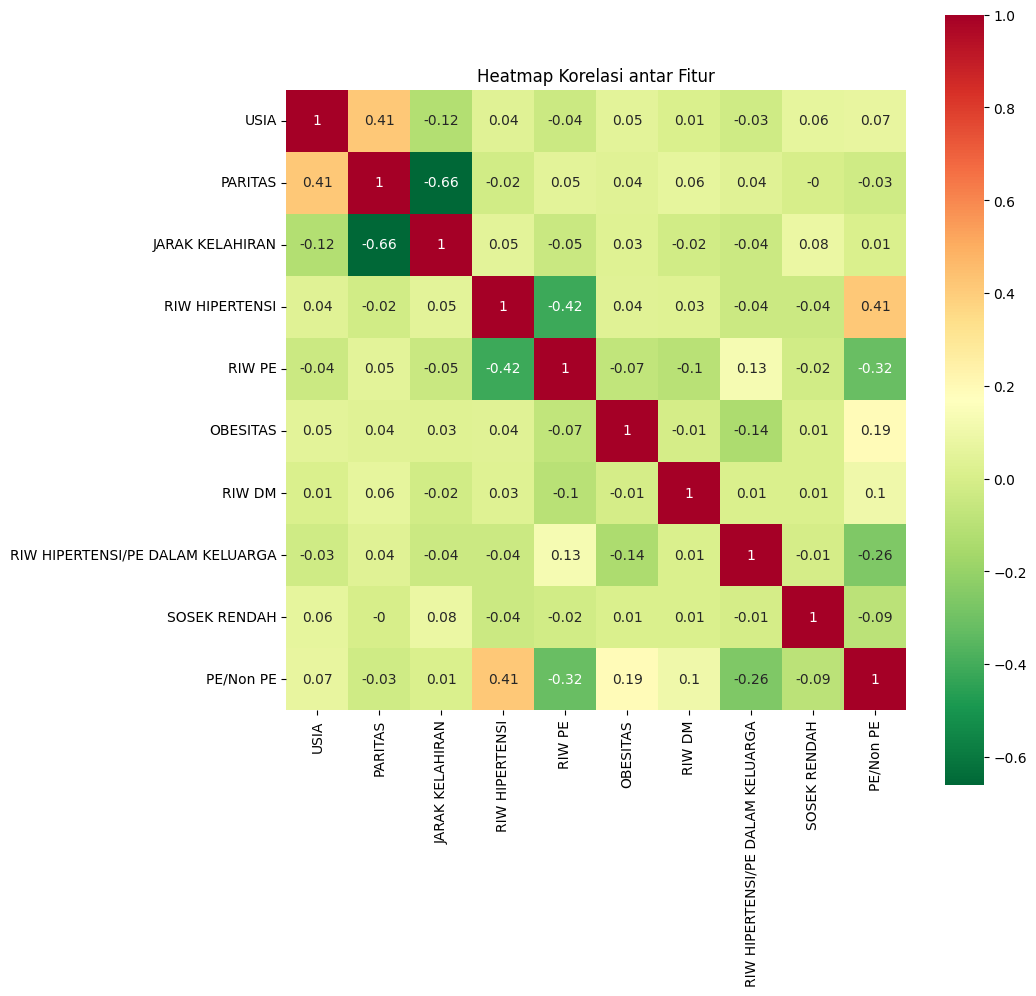

In [11]:
correlation = df2.corr()
plt.figure(figsize=(10,10))
plt.title("Heatmap Korelasi antar Fitur")
sns.heatmap(
    correlation.round(2),
    annot = True,
    vmax = 1,
    square = True,
    cmap = 'RdYlGn_r'
)

plt.show()

In [12]:
X_norm = df2.drop('PE/Non PE', axis=1).values
y = df2['PE/Non PE']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clean_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clean_classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, precision_score

In [16]:
def evaluation(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    rcl = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    ps = precision_score(y_test, y_pred, average='weighted')

    metric_dict = {
        'Accuracy' : round(acc, 3),
        'recall' : round(rcl, 3),
        'F1 Score' : round(f1, 3),
        'Precision Score' : round(ps, 3)
    }

    return print(metric_dict)

In [17]:
y_pred_rf = clean_classifier_rf.predict(x_test)

print("\nRandom Forest Model:")
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf)
print("classification_report: ")
print(classification_report(y_test, y_pred_rf))




Random Forest Model:
Accuracy:  0.914
classification_report: 
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       128
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           5       0.14      0.25      0.18         4
           6       0.00      0.00      0.00         1

    accuracy                           0.91       139
   macro avg       0.22      0.25      0.23       139
weighted avg       0.89      0.91      0.90       139



c:\Users\desmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\desmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\desmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo